In [1]:
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os 

c:\Work\software\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


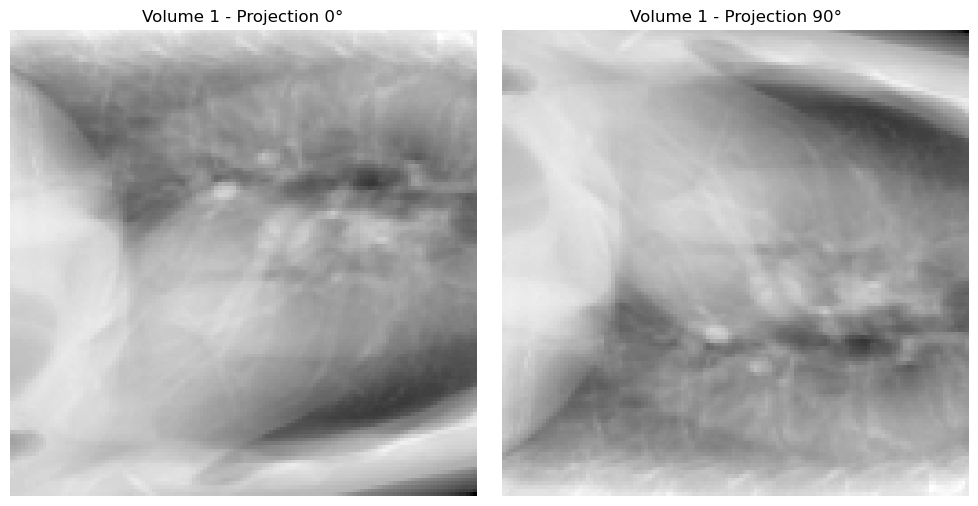

In [3]:
path_angle0 = "data/processed/projections/1_angle0.npy"
path_angle90 = "data/processed/projections/1_angle90.npy"

drr0 = np.load(path_angle0)
drr90 = np.load(path_angle90)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(drr0, cmap='gray')
axs[0].set_title(f"Volume 1 - Projection 0°")
axs[0].axis("off")

axs[1].imshow(drr90, cmap='gray')
axs[1].set_title(f"Volume 1 - Projection 90°")
axs[1].axis("off")

plt.tight_layout()
plt.show()

c:\Work\software\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


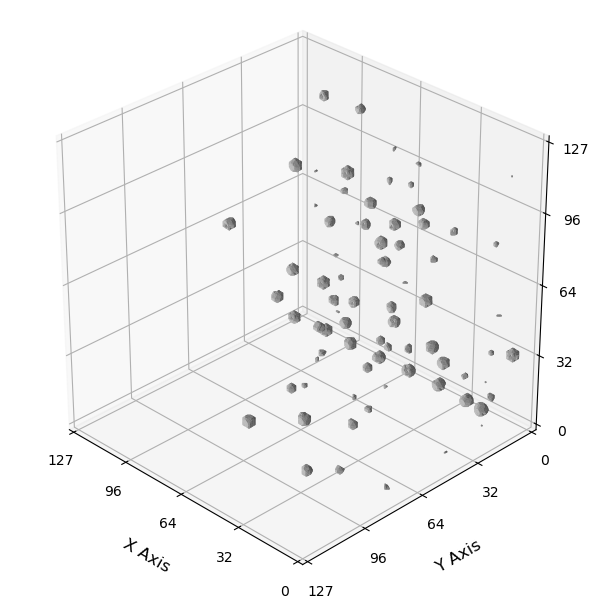

In [ ]:
def plot_volume_mesh(bin_volume: np.ndarray, level: float = 0.5):
    verts, faces, normals, _ = measure.marching_cubes(
        bin_volume.astype(np.uint8), level=level)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect((1, 1, 1))  

    tri = ax.plot_trisurf(
        verts[:, 0], verts[:, 1], faces, verts[:, 2],
        linewidth=0.2, antialiased=True, color='lightgray')

    ax.set_xlim(0, 127)
    ax.set_ylim(0, 127)
    ax.set_zlim(0, 127)

    ax.view_init(elev=30, azim=135)  

    ax.set_xlabel("X Axis", labelpad=10, fontsize=12)
    ax.set_ylabel("Y Axis", labelpad=10, fontsize=12)
    ax.set_zlabel("Z Axis", labelpad=10, fontsize=12)

    ax.set_xticks([0, 32, 64, 96, 127])
    ax.set_yticks([0, 32, 64, 96, 127])
    ax.set_zticks([0, 32, 64, 96, 127])

    ax.grid(True, color='gray', linestyle=':', linewidth=0.5)

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    bin_path = "results/3dgr_volumes/1_3dgr_binary.npy"
    if not os.path.exists(bin_path):
        raise FileNotFoundError(f"File not found.")

    volume_bin = np.load(bin_path) 
    
    plot_volume_mesh(volume_bin, level=0.5)
